In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

import sklearn.linear_model as lm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline

## Examples with random data

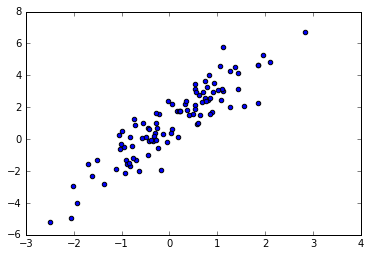

In [3]:
n = 100
x = np.random.normal(size=(n,1))
eps = np.random.normal(0, 1, size=(n,1))
y = 1 + 2*x + eps
plt.scatter(x, y)


In [4]:
m = lm.LinearRegression()
f = m.fit(x, y)
print(f.intercept_)
print(f.coef_)


[0.97156488]
[[2.0381768]]


In [5]:
df = pd.DataFrame(np.concatenate((x, y), axis=1), columns=['x', 'y'])
mod = smf.ols(formula='y ~ x', data=df)
res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     470.8
Date:                Wed, 11 Apr 2018   Prob (F-statistic):           3.33e-39
Time:                        16:33:10   Log-Likelihood:                -135.35
No. Observations:                 100   AIC:                             274.7
Df Residuals:                      98   BIC:                             279.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9716      0.095     10.230      0.0

In [6]:
X = np.concatenate((np.ones_like(y), x), axis=1)
print(X[:5,:])
np.linalg.inv(X.T @ X) @ X.T @ y

[[ 1.         -0.42719226]
 [ 1.         -0.95469833]
 [ 1.          0.04866684]
 [ 1.          0.61142595]
 [ 1.         -0.31206167]]


array([[0.97156488],
       [2.0381768 ]])

In [7]:
from sklearn.datasets import load_boston
b = load_boston()
boston = pd.DataFrame(b.data, columns=b.feature_names)
boston["old"] = boston.AGE > 50
boston["const"] = 1
x = np.matrix(boston[["const", "old"]], dtype="float")
y = b.target.reshape(506,1)

In [8]:
xx = x.T.dot(x)
print(np.linalg.inv(xx))

[[ 0.00680272 -0.00680272]
 [-0.00680272  0.00958824]]


## Dummy variables

In [13]:
credit = pd.read_table('../data/credit.tsv.bz2')
print(credit.head())
print(credit.Ethnicity.unique())

   ID   Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
0   1   14.891   3606     283      2   34         11    Male      No     Yes   
1   2  106.025   6645     483      3   82         15  Female     Yes     Yes   
2   3  104.593   7075     514      4   71         11    Male      No      No   
3   4  148.924   9504     681      3   36         11  Female      No      No   
4   5   55.882   4897     357      2   68         16    Male      No     Yes   

   Ethnicity  Balance  
0  Caucasian      333  
1      Asian      903  
2      Asian      580  
3      Asian      964  
4  Caucasian      331  
['Caucasian' 'Asian' 'African American']


## Exercise

1. Create random data x ~ N(0,1); eps ~ N(0, 0.5); yX = x + eps; y = 1(yX > 0)

2. estimate ols y = a + bx + eps  (note: it's categorical y, not continuous yX)

3. store b

4. repeat this 1000 times

5. find empirical 95% confidence intervals of b

6. compare with the smf.ols confidence intervals for a similar regression

In [24]:
## pick sample size:
n =
## create x:
x = np.random.normal(size=(n,1))
## create eps
## what are good value for a, b?
a =
b =
## create yX
yX =
## create y = 1(yX > 0)
y =

## Estimate y = a + b*x + eps
m = lm.LinearRegression()
m.fit



SyntaxError: invalid syntax (<ipython-input-24-1265def8b4d6>, line 2)

In [ ]:
## Repeat this 1000 times and store b
R = 1000
bs = np.empty(size=R)
for i in range(R):
    ## create data
    ## estimate OLS
    ## find b:
    bs[i] = f.coef_

In [26]:
## find the empirical 95% confidence intervals
np.percentile(bs, 2.5)
np.percentile(bs, 97.5)

## Estimate your (last) y, x with statsmodels.formula.api as above
## print summary().  It includes confidence intervals
## are these similar?

4.95